In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [3]:
csv_path = r"C:\Users\91797\Downloads\house-prices-advanced-regression-techniques\train.csv"
train_data = pd.read_csv(csv_path)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df = pd.DataFrame(train_data)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print("Are there any null values :")
train_df.isnull()

Are there any null values :


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [6]:
from sklearn.preprocessing import LabelEncoder

# We convert categorical values to numerical values 
# Like : In MSZoning, RL represents 3, RM represents 4 etc
categ = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'MasVnrType', 'SaleCondition']
le = LabelEncoder()

#train_data.drop(categ, axis=1, inplace=True)

train_df[categ] = train_df[categ].apply(le.fit_transform)
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [7]:
print("Count of null values in each column: ")
pd.set_option('display.max_rows', 100)
train_df.isnull().sum()

Count of null values in each column: 


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

Number of NaN values in each column:
LotFrontage      259
GarageYrBlt       81

Text(0, 0.5, 'Garage Cond')

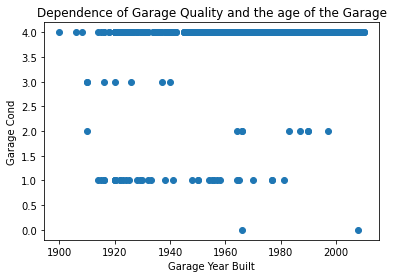

In [8]:
x = train_df["GarageYrBlt"]
y = train_df["GarageCond"]
plt.scatter(x,y)

plt.title("Dependence of Garage Quality and the age of the Garage")
plt.xlabel("Garage Year Built")
plt.ylabel("Garage Cond")

By looking at the above scatter plot, we understand that there is no clear dependence of garage quality and the age of the garage.

Text(0, 0.5, 'Lot Frontage')

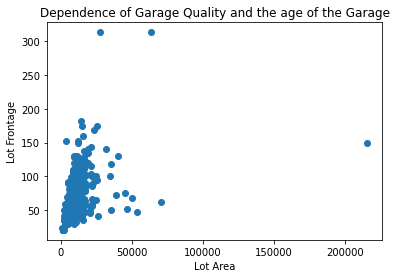

In [9]:
x = train_df["LotArea"]
y = train_df["LotFrontage"]
plt.scatter(x,y)

plt.title("Dependence of Garage Quality and the age of the Garage")
plt.xlabel("Lot Area")
plt.ylabel("Lot Frontage")

By looking at the above scatter plot, we understand that using linear regression to predict the missing values of Lot Frontage can be useful

In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
train_df_imputed = pd.DataFrame(imputer.fit_transform(train_df), columns = train_df.columns)
train_df_imputed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,65.0,8450.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,12.0,2008.0,8.0,4.0,250000.0


In [11]:
train_df_imputed.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

(0.0, 791005.0)

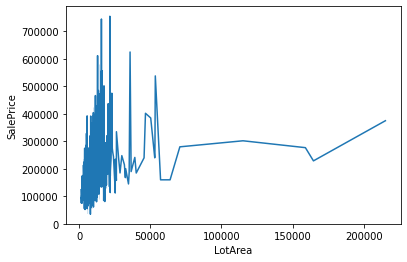

In [12]:
import seaborn as sns

sns.lineplot(x = "LotArea", y = "SalePrice", data = train_df_imputed)
#plt.xlim(0,50000)
plt.ylim(0,)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

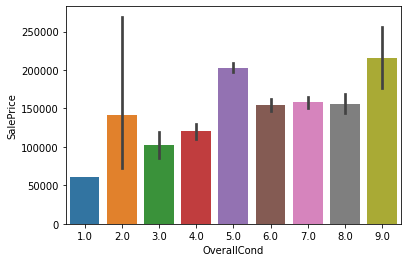

In [13]:
sns.barplot(x='OverallCond', y='SalePrice', data = train_df_imputed) 

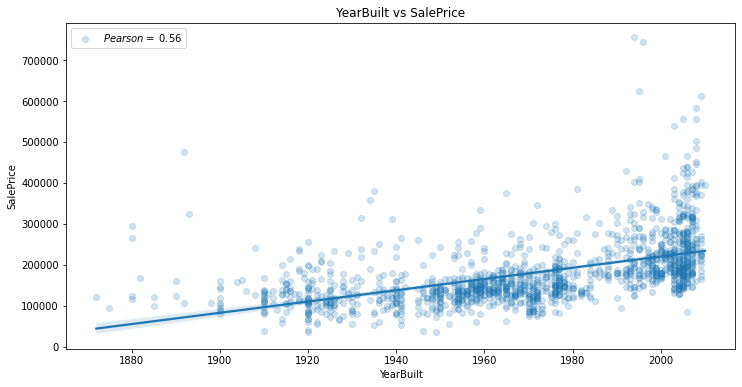

In [14]:
Pearson_YrBlt = 0.56
plt.figure(figsize = (12,6))
sns.regplot(data = train_df_imputed, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBlt)], loc = 'best')
plt.show()

In [15]:
y_train = pd.DataFrame(train_df_imputed['SalePrice'])
train_df_imputed.drop(['SalePrice'], axis=1, inplace=True)

x_train = pd.DataFrame(train_df_imputed)
x_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,3.0,65.0,8450.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,2.0,2008.0,8.0,4.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,5.0,2007.0,8.0,4.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,9.0,2008.0,8.0,4.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,2.0,2006.0,8.0,0.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,12.0,2008.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3.0,62.0,7917.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,8.0,2007.0,8.0,4.0
1456,1457.0,20.0,3.0,85.0,13175.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,2.0,4.0,0.0,2.0,2010.0,8.0,4.0
1457,1458.0,70.0,3.0,66.0,9042.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,0.0,2.0,2500.0,5.0,2010.0,8.0,4.0
1458,1459.0,20.0,3.0,68.0,9717.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,4.0,2010.0,8.0,4.0


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.0001, random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
regressor = LinearRegression()

regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
from sklearn.linear_model import LinearRegression
regressor.score(x_train, y_train)

0.8531695479807843

In [19]:
Yhat = regressor.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Yhat)

233593495.9080904

In [21]:
test_csv_path = r"C:\Users\91797\Downloads\house-prices-advanced-regression-techniques\test.csv"
test_df = pd.read_csv(csv_path)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
test_df.drop(['SalePrice'],axis=1).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [23]:
test_df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [24]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [25]:
from sklearn.preprocessing import LabelEncoder

# We convert categorical values to numerical values 
# Like : In MSZoning, RL represents 3, RM represents 4 etc
categ = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'MasVnrType', 'SaleCondition']
le = LabelEncoder()

#train_data.drop(categ, axis=1, inplace=True)

test_df[categ] = test_df[categ].apply(le.fit_transform)
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [26]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
test_df_imputed = pd.DataFrame(imputer.fit_transform(test_df), columns = test_df.columns)
test_df_imputed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,65.0,8450.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,12.0,2008.0,8.0,4.0,250000.0


In [27]:

y_test_df = test_df_imputed['SalePrice']
test_df_imputed.drop(['SalePrice'], axis=1, inplace=True)
x_test_df = test_df_imputed
#regressor.fit(x_test_df,y_test_df)


In [28]:
x_test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,3.0,65.0,8450.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,2.0,2008.0,8.0,4.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,5.0,2007.0,8.0,4.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,9.0,2008.0,8.0,4.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,2.0,2006.0,8.0,0.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,12.0,2008.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3.0,62.0,7917.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,8.0,2007.0,8.0,4.0
1456,1457.0,20.0,3.0,85.0,13175.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,2.0,4.0,0.0,2.0,2010.0,8.0,4.0
1457,1458.0,70.0,3.0,66.0,9042.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,0.0,2.0,2500.0,5.0,2010.0,8.0,4.0
1458,1459.0,20.0,3.0,68.0,9717.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,4.0,2010.0,8.0,4.0


In [29]:
Yhat2 = regressor.predict(x_test_df)
Yhat2

array([[216972.93384098],
       [202184.45818661],
       [220331.44224279],
       ...,
       [247809.84584773],
       [148823.14988387],
       [158106.71586773]])

In [30]:

reg = LinearRegression().fit(x_train, y_train)
reg.score(x_test_df, y_test_df)

0.8531850007668896

In [31]:
y_test_df

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [32]:
pred = pd.DataFrame(y_test_df)
sub_df = pd.read_csv("C:/Users/91797/Downloads/house-prices-advanced-regression-techniques/sample_submission_2.csv")
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.drop([1459], axis=0, inplace=True)

In [33]:
datasets.dtypes

Id           float64
SalePrice    float64
dtype: object

In [34]:
datasets["Id"] = datasets["Id"].astype("int32")

In [35]:
datasets.dtypes

Id             int32
SalePrice    float64
dtype: object

In [36]:
datasets.to_csv("C:/Users/91797/Downloads/house-prices-advanced-regression-techniques/sample_submission_2.csv", index=False)